# Introduction 

websites related to the dataset 
* https://corgis-edu.github.io/corgis/csv/food/
* https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
* https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf



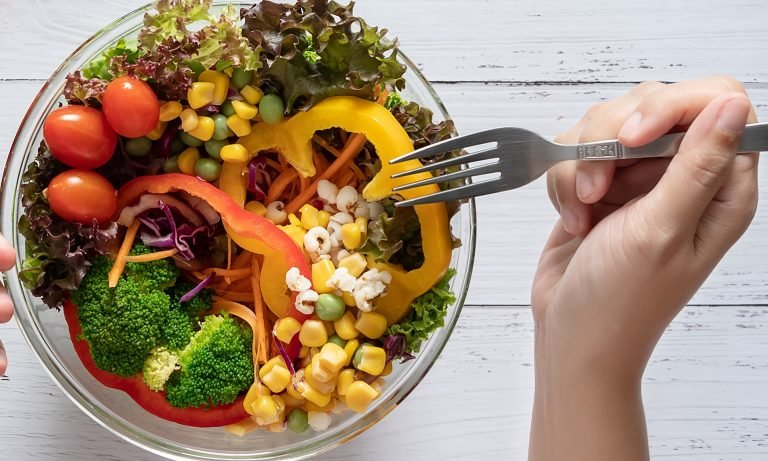

# Import Modules

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
import wordcloud
from pylab import * 

import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Read Data from Website 


In [2]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head(40)


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
6,Milk,"Milk, calcium fortified, fat free (skim)",11111170,0,0,0,4.85,2,16.0,0.0,...,101,166,52,0.40,137,0.38,0.040,1.0,0.01,0.0
7,Milk,"Milk, reduced fat (2%)",11112110,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2
8,Milk,"Milk, acidophilus, low fat (1%)",11112120,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
9,Milk,"Milk, acidophilus, reduced fat (2%)",11112130,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2


In [3]:
df.shape ## chacking the shape of the dataset

(7083, 38)

In [4]:
Nutrient_Count = df.loc[:, ~df.columns.isin(['Nutrient Data Bank Number', 'Description','Category','Data.Water','Data.Sugar Total'])]
Nutrient_Count.shape


(7083, 33)

There are 34 Nutrients including cholestrol

# Through data info we are trying to see the data types of all the columns in the dataset and checking for the null values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

# Random Sampling 


In [6]:
import random
random.seed(5)
from sklearn.utils import shuffle
df = shuffle(df)
df = df.sample(frac=0.9, replace=False, random_state=1)
df

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
1799,Beef and noodles with cream or white sauce,Beef and noodles with cream or white sauce,27212300,0,12,0,15.02,34,34.8,0.6,...,96,101,296,1.21,42,0.42,0.133,0.0,0.43,1.7
3747,Breakfast bar,"Breakfast bar, date, with yogurt coating",53714510,0,1,0,70.90,0,14.6,4.6,...,62,207,350,0.39,9,0.09,0.075,0.3,0.65,5.8
2367,Chicken fillet sandwich,"Chicken fillet sandwich, grilled, on white bun...",27540196,0,11,1,17.68,62,48.4,0.6,...,232,247,493,1.12,40,0.36,0.483,0.4,0.70,3.2
4192,Cereal (General Mills Cheerios),Cereal (General Mills Cheerios),57123000,0,0,0,73.20,0,26.2,10.1,...,357,633,497,13.40,990,6.77,1.790,21.4,0.41,2.0
4717,Pasta with tomato-based sauce,"Pasta with tomato-based sauce, meat, and added...",58146333,1,150,9,18.50,8,15.4,1.6,...,61,167,299,0.91,13,0.24,0.123,4.4,1.00,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Chicken breast,"Chicken breast, grilled with sauce, skin eaten",24123310,0,25,0,7.34,78,52.9,0.2,...,160,280,454,0.74,16,0.14,0.573,0.1,0.85,3.1
2963,Bean soup,"Bean soup, with macaroni, home recipe, canned,...",41601090,70,177,0,12.90,3,13.0,2.3,...,60,167,210,0.61,24,0.04,0.042,0.8,0.53,8.2
3486,Cookie,"Cookie, cone shell, ice cream type, wafer or cake",53222020,0,0,0,79.00,0,9.4,3.0,...,97,112,256,0.67,0,0.00,0.030,0.0,0.78,1.8
2724,Egg omelet or scrambled egg,"Egg omelet or scrambled egg, made with margarine",32130000,0,40,8,0.72,347,219.8,0.0,...,185,130,286,1.20,203,0.66,0.334,0.0,2.16,6.8


# Checking for Missing Values 
Showing two different ways of checking for missing values per column ( using `.info` and .isna().sum()) 




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 1799 to 6183
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                    

In [8]:
df.isna().sum() 

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Beta Carotene                0
Data.Beta Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein and Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monosaturated Fat        0
Data.Fat.Polysaturated Fat        0
Data.Fat.Saturated Fat            0
Data.Fat.Total Lipid              0
Data.Major Minerals.Calcium       0
Data.Major Minerals.Copper        0
Data.Major Minerals.Iron          0
Data.Major Minerals.Magnesiu

There are no missing values, so we dont need to impute them 

# Literature Review and Basic EDA 



## Lit review 

In this section I am trying to tell a story about different food products and their cholesterol values - what do they have in common?

 What foods are high in cholesterol? Which nutrients are most correlated with cholesterol? 
 
 And Backing our analysis up with at least 10 citations - citing them inline [1] and also as a list below 

**Citations**

Foods with high cholestrol

1. https://www.healthline.com/nutrition/high-cholesterol-foods#about-cholesterol

2. https://www.heartuk.org.uk/low-cholesterol-foods/foods-that-contain-cholesterol

3. https://www.webmd.com/diet/high-cholesterol-foods#1


4. https://www.gbhealthwatch.com/Nutrient-Cholesterol-TopFoods.php#:~:text=Cholesterol%20is%20only%20found%20in,in%20cholesterol%20are%20shown%20below.


Foods with low cholestrol

5. https://www.heartuk.org.uk/healthy-living/cholesterol-lowering-foods

6. https://theconversation.com/got-high-cholesterol-here-are-five-foods-to-eat-and-avoid-63941#:~:text=Pulses%20are%20high%20in%20vegetable,bacteria%20in%20the%20large%20bowel.

7. https://food.ndtv.com/health/eating-beans-and-pulses-daily-can-reduce-bad-cholesterol-by-5-percent-694920

8. https://www.unassaggio.com/is-eating-pineapple-good-for-cholesterol/


Choline correlation with cholestrol

9. https://pubmed.ncbi.nlm.nih.gov/24368431/#:~:text=Choline%20supplementation%20normalized%20cholesterol%20metabolism,health%20by%20maintaining%20cholesterol%20homeostasis.

10. https://www.hsph.harvard.edu/nutritionsource/choline/









In [9]:
Food_Cholesterol = df[['Category','Data.Cholesterol']] #creating new dataset with category and cholestrol and naming it as Food_Cholestrol
Food_Cholesterol



,Category,Data.Cholesterol
1799,Beef and noodles with cream or white sauce,34
3747,Breakfast bar,0
2367,Chicken fillet sandwich,62
4192,Cereal (General Mills Cheerios),0
4717,Pasta with tomato-based sauce,8
...,...,...
948,Chicken breast,78
2963,Bean soup,3
3486,Cookie,0
2724,Egg omelet or scrambled egg,347


# checking top 10 foods with high cholestrol

In [10]:
A = Food_Cholesterol.groupby(by="Category").sum()
Food_Cholesterol_max = A.sort_values(by='Data.Cholesterol',ascending=False) ## showing foods with high cholestrol and naming it as Food_Cholesterol_max
Food_Cholesterol_max.head(10) # Displaying only top 10 values

#Citations:
# https://www.healthline.com/nutrition/high-cholesterol-foods#about-cholesterol
# https://www.heartuk.org.uk/low-cholesterol-foods/foods-that-contain-cholesterol
# https://www.webmd.com/diet/high-cholesterol-foods#1
# https://www.gbhealthwatch.com/Nutrient-Cholesterol-TopFoods.php#:~:text=Cholesterol%20is%20only%20found%20in,in%20cholesterol%20are%20shown%20below.



,Data.Cholesterol
Category,
Egg omelet or scrambled egg,23914
Egg,12662
Chicken,3485
Cheese,3301
Beef,3230
Chicken thigh,3136
Brains,3074
Frankfurter or hot dog sandwich,3056
Turkey,3013


We can see that Egg omelet or scrambled egg, Egg, chicken, beef, chicken drumstick, chicken thigh, cheese, squid, Brains and Shrimp are the top 10 highest cholestrol rich foods


And there is one thing common in all high cholestrol rich categories that they belongs to meat, poultry, fish, and eggs or animal products






# Checking top 10 Foods with low cholestrol

In [11]:
Food_Cholesterol_min = A.sort_values(by='Data.Cholesterol',ascending=True) ## showing foods with low cholestrol and naming it as Food_Cholesterol_min
Food_Cholesterol_min.head(10) # Displaying only top 10 values

# Citations
# https://www.heartuk.org.uk/healthy-living/cholesterol-lowering-foods
# https://theconversation.com/got-high-cholesterol-here-are-five-foods-to-eat-and-avoid-63941#:~:text=Pulses%20are%20high%20in%20vegetable,bacteria%20in%20the%20large%20bowel.
# https://food.ndtv.com/health/eating-beans-and-pulses-daily-can-reduce-bad-cholesterol-by-5-percent-694920
# https://www.unassaggio.com/is-eating-pineapple-good-for-cholesterol/

,Data.Cholesterol
Category,
Hot pepper sauce,0
Ginger root,0
Rice with raisins,0
Rice with onions,0
Rice pilaf,0
Rice paper,0
Rice noodles,0
Rice milk,0
Rice dressing,0


We can see that Kidney beans and white rice,Pinto beans and rice,Pinto beans,Pink beans,Pineapple juice,Pineapple dessert,Pineapple candy,Pineapple,
Pine nuts and Chili with beans are the top 10 lowest cholestrol rich foods


And there is one thing common in all low cholestrol rich categories that they belongs to pulses categories with high fiber and starch contents. And also fruit like pineapple is low in cholestrol


# Next we want to see which nutrients are most correlated with cholestrol

In [12]:
Nutrient_Cholesterol = df.loc[:, ~df.columns.isin(['Nutrient Data Bank Number', 'Description','Category','Data.Water','Data.Sugar Total'])] ## excluding columns which are not nutrients in the dataset

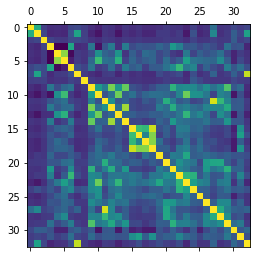

In [13]:
## Creating correlation matrix
import matplotlib.pyplot as plt
plt.matshow(Nutrient_Cholesterol.corr())
plt.show()
Nutrient_Correlation = Nutrient_Cholesterol.corr()




In [14]:
Correlation = Nutrient_Correlation[['Data.Cholesterol']] #creating correlation of different nutrients with cholestrol
Correlation



,Data.Cholesterol
Data.Alpha Carotene,-0.052496
Data.Beta Carotene,-0.076678
Data.Beta Cryptoxanthin,-0.016912
Data.Carbohydrate,-0.223044
Data.Cholesterol,1.000000
Data.Choline,0.790020
Data.Fiber,-0.200975
Data.Lutein and Zeaxanthin,-0.016382
Data.Lycopene,-0.038205
Data.Niacin,0.054046


In [15]:
c1 = Correlation.abs().unstack() ## Sorting in ascending order to see the highly correlated nutrients
c1.sort_values(ascending = False)


Data.Cholesterol  Data.Cholesterol                  1.000000
                  Data.Choline                      0.790020
                  Data.Selenium                     0.401770
                  Data.Protein                      0.384643
                  Data.Major Minerals.Phosphorus    0.267992
                  Data.Vitamins.Vitamin B12         0.225753
                  Data.Carbohydrate                 0.223044
                  Data.Fat.Saturated Fat            0.204525
                  Data.Fiber                        0.200975
                  Data.Retinol                      0.169471
                  Data.Fat.Total Lipid              0.168573
                  Data.Major Minerals.Sodium        0.150680
                  Data.Fat.Monosaturated Fat        0.143904
                  Data.Vitamins.Vitamin A - RAE     0.128943
                  Data.Riboflavin                   0.114507
                  Data.Major Minerals.Copper        0.099803
                  Data.V

# From the above table we can see that:
-- Nutrients which are highly positively correlated with cholestrol is only Choline. And it is higly positively correlated with cholestrol meaning that if choline will increase, cholestrol will also increase.




In [16]:
# Citations
# Choline correlation with cholestrol
# https://pubmed.ncbi.nlm.nih.gov/24368431/#:~:text=Choline%20supplementation%20normalized%20cholesterol%20metabolism,health%20by%20maintaining%20cholesterol%20homeostasis.
# https://www.hsph.harvard.edu/nutritionsource/choline/

## Unique values from `Category` 
* Counting how many unique values are in `df['Category']`
* Making a frequency table of how many entries exist per `df['Category']`. Which categories are most common?
* Making a histogram from the calculated frequency table. 

In [17]:
n = len(pd.unique(df['Category'])) ## counting unique values in category column
n

2250

In [18]:
Category = df['Category'].value_counts(sort=True) ## Making frequency table and saving it as category
Category
Category.head(10) 


Infant formula                     159
Rice                               133
Bread                              103
Potato                              98
Cookie                              90
Frankfurter or hot dog sandwich     88
Coffee                              82
Egg omelet or scrambled egg         78
Pie                                 72
Beef                                67
Name: Category, dtype: int64

From this frequency table we can see that Infant formula, Rice, Bread, Potato and cookie are the most common categories 

Text(0.5, 1.0, 'Category Frequency Table')

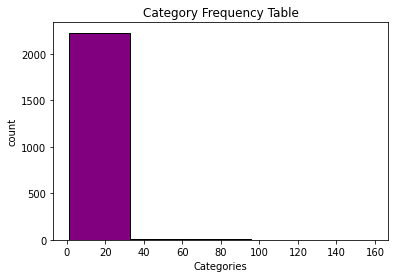

In [19]:
##making histogram of frequency table above
Category.hist(grid=False, bins=5, color='purple', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('count')
plt.title('Category Frequency Table')

In [20]:
Category = df[['Category']].value_counts(sort=True).rename_axis('unique_values').reset_index(name='counts') ## Making frequency table and saving it as category
Category = Category.iloc[:11, :]
Category

,unique_values,counts
0,Infant formula,159
1,Rice,133
2,Bread,103
3,Potato,98
4,Cookie,90
5,Frankfurter or hot dog sandwich,88
6,Coffee,82
7,Egg omelet or scrambled egg,78
8,Pie,72
9,Beef,67


<BarContainer object of 11 artists>

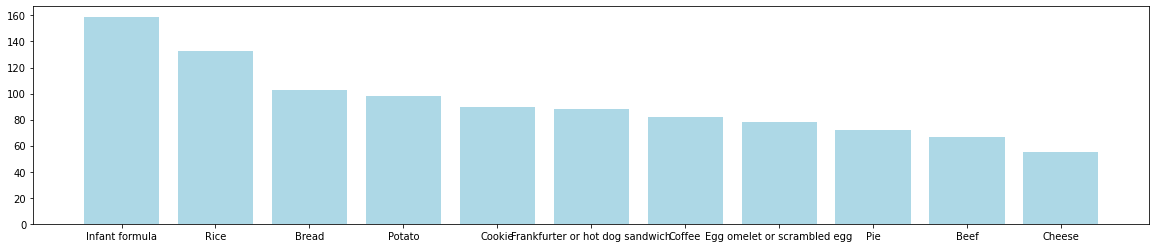

In [21]:
plt.figure(figsize = (20, 4))
bar(Category['unique_values'], Category['counts'], color = 'lightblue')

## Correlation 




 Making different correlation matrices - Since we have more than 10 variables it was hard to read, so let's start big and then simplify. 

* making one for the entire dataset 
* Then, making four more correlation matrices that only contain:
  * fat-related
  * major minerals-related
  * vitamins-related
  * none of the above ('Alpha Carotene' through and including 'Water')



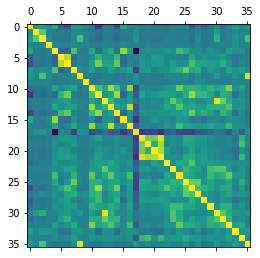

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Nutrient Data Bank Number,1.000000,0.088805,0.172546,0.054976,0.259663,-0.283859,-0.366109,0.183919,0.130644,0.030889,...,-0.338860,-0.064703,-0.227381,-0.139709,0.030349,-0.166266,-0.041169,0.203014,0.060584,0.136372
Data.Alpha Carotene,0.088805,1.000000,0.536357,0.006877,-0.059980,-0.052496,-0.064943,0.031160,0.042722,0.002079,...,-0.096396,0.008604,-0.063225,-0.040026,0.212121,-0.040508,-0.027849,0.035579,-0.008963,0.028895
Data.Beta Carotene,0.172546,0.536357,1.000000,0.035030,-0.086622,-0.076678,-0.086670,0.081710,0.485240,0.006355,...,-0.141949,0.076335,-0.089216,-0.062656,0.347737,-0.057649,-0.015357,0.142115,0.029464,0.477418
Data.Beta Cryptoxanthin,0.054976,0.006877,0.035030,1.000000,0.022638,-0.016912,-0.024840,0.053391,0.046008,0.014702,...,-0.056042,0.022839,-0.039208,-0.027690,0.009021,-0.023051,-0.013982,0.133595,0.001614,0.035153
Data.Carbohydrate,0.259663,-0.059980,-0.086622,0.022638,1.000000,-0.223044,-0.225980,0.493282,-0.074103,-0.054508,...,0.101003,0.116438,0.043720,0.104183,0.058066,-0.010793,0.228637,0.079591,0.101167,-0.093406
Data.Cholesterol,-0.283859,-0.052496,-0.076678,-0.016912,-0.223044,1.000000,0.790020,-0.200975,-0.016382,-0.038205,...,0.267992,0.027449,0.150680,0.080873,0.128943,0.225753,0.032862,-0.098258,-0.002451,-0.053093
Data.Choline,-0.366109,-0.064943,-0.086670,-0.024840,-0.225980,0.790020,1.000000,-0.121272,-0.009748,-0.041960,...,0.466969,0.246227,0.217993,0.186701,0.181756,0.363040,0.135748,-0.099014,0.045638,-0.043540
Data.Fiber,0.183919,0.031160,0.081710,0.053391,0.493282,-0.200975,-0.121272,1.000000,0.080011,0.019845,...,0.263290,0.330027,0.011350,0.158056,0.060669,-0.002944,0.289897,0.101377,0.220058,0.062367
Data.Lutein and Zeaxanthin,0.130644,0.042722,0.485240,0.046008,-0.074103,-0.016382,-0.009748,0.080011,1.000000,-0.012820,...,-0.075078,0.067797,-0.055903,-0.019878,0.161427,-0.036235,0.000948,0.150391,0.031845,0.888080
Data.Lycopene,0.030889,0.002079,0.006355,0.014702,-0.054508,-0.038205,-0.041960,0.019845,-0.012820,1.000000,...,-0.054173,0.110679,0.033837,-0.023403,-0.030693,-0.029257,-0.032121,0.033310,-0.002976,-0.016172


In [22]:
#Importing library
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()
df.corr() #creating correlation with the entire dataset

 This correlation matrix was hard to read, so we are simplyfying it to make it more understandable

# Correlation matrxi for fats

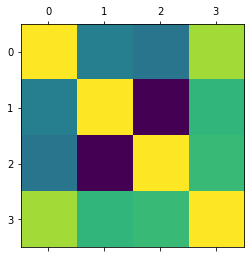

,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
Data.Fat.Monosaturated Fat,1.000000,0.613326,0.584995,0.904878
Data.Fat.Polysaturated Fat,0.613326,1.000000,0.320974,0.768719
Data.Fat.Saturated Fat,0.584995,0.320974,1.000000,0.779380
Data.Fat.Total Lipid,0.904878,0.768719,0.779380,1.000000


In [23]:
fat_related = df[["Data.Fat.Monosaturated Fat", "Data.Fat.Polysaturated Fat","Data.Fat.Saturated Fat","Data.Fat.Total Lipid"]] ## creating new dataset for fat related
plt.matshow(fat_related.corr())
plt.show()
fat_related.corr() # creating correlation for fats related

# Analysis:

Data.Fat.Monosaturated Fat iss highly positively correlated with Data.Fat.Polysaturated Fat, Data.Fat.Saturated Fat, Data.Fat.Total Lipid 

# Correlation matrix for major minerals

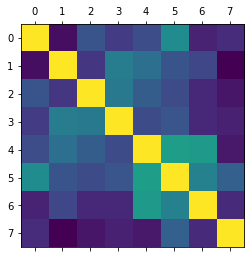

,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Zinc,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium
Data.Major Minerals.Calcium,1.000000,0.077031,0.291040,0.205840,0.265040,0.507213,0.134213,0.162463
Data.Major Minerals.Copper,0.077031,1.000000,0.192884,0.446832,0.391238,0.288707,0.244338,0.040036
Data.Major Minerals.Iron,0.291040,0.192884,1.000000,0.427300,0.323020,0.259879,0.151144,0.099535
Data.Major Minerals.Zinc,0.205840,0.446832,0.427300,1.000000,0.264504,0.291730,0.146156,0.127089
Data.Major Minerals.Magnesium,0.265040,0.391238,0.323020,0.264504,1.000000,0.577844,0.555058,0.105874
Data.Major Minerals.Phosphorus,0.507213,0.288707,0.259879,0.291730,0.577844,1.000000,0.462213,0.336044
Data.Major Minerals.Potassium,0.134213,0.244338,0.151144,0.146156,0.555058,0.462213,1.000000,0.152804
Data.Major Minerals.Sodium,0.162463,0.040036,0.099535,0.127089,0.105874,0.336044,0.152804,1.000000


In [24]:
major_minerals_related = df[["Data.Major Minerals.Calcium", "Data.Major Minerals.Copper","Data.Major Minerals.Iron","Data.Major Minerals.Zinc","Data.Major Minerals.Magnesium","Data.Major Minerals.Phosphorus","Data.Major Minerals.Potassium","Data.Major Minerals.Sodium"]] ### creating new dataset for minerals related
plt.matshow(major_minerals_related.corr())
plt.show()
major_minerals_related.corr() # creating correlation for fats related

# From the mineral correlation matrix we can see that:

-- Phosphorus and potasium are highly correlated with Magnesium.

-- Also phosphorus is highly correlated with calcium

# Correlation matrix for Vitamins

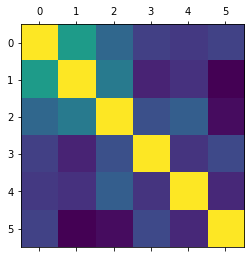

,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Data.Vitamins.Vitamin A - RAE,1.000000,0.530321,0.301995,0.152456,0.128511,0.162274
Data.Vitamins.Vitamin B12,0.530321,1.000000,0.387248,0.059857,0.103205,-0.045122
Data.Vitamins.Vitamin B6,0.301995,0.387248,1.000000,0.208311,0.268258,-0.010610
Data.Vitamins.Vitamin C,0.152456,0.059857,0.208311,1.000000,0.110068,0.185788
Data.Vitamins.Vitamin E,0.128511,0.103205,0.268258,0.110068,1.000000,0.075377
Data.Vitamins.Vitamin K,0.162274,-0.045122,-0.010610,0.185788,0.075377,1.000000


In [25]:
vitamins_related = df[["Data.Vitamins.Vitamin A - RAE", "Data.Vitamins.Vitamin B12","Data.Vitamins.Vitamin B6","Data.Vitamins.Vitamin C","Data.Vitamins.Vitamin E","Data.Vitamins.Vitamin K"]]### creating new dataset for Vitamins related
plt.matshow(vitamins_related.corr())
plt.show()
vitamins_related.corr() # creating correlation for Vitamins related

# From the Vitamin correlation matrix we can see that:

-- Vitamin B12  are highly correlated with Viatmin A.


# Correlation matrix for the remaining columns

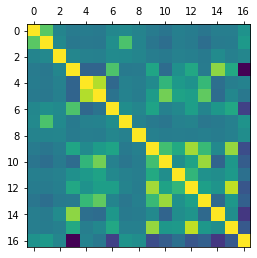

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water
Data.Alpha Carotene,1.000000,0.536357,0.006877,-0.059980,-0.052496,-0.064943,0.031160,0.042722,0.002079,-0.059802,-0.105389,-0.028178,-0.047817,-0.097820,-0.038064,-0.032323,0.114762
Data.Beta Carotene,0.536357,1.000000,0.035030,-0.086622,-0.076678,-0.086670,0.081710,0.485240,0.006355,-0.095896,-0.155899,-0.036012,-0.057481,-0.154934,-0.058551,-0.052081,0.160198
Data.Beta Cryptoxanthin,0.006877,0.035030,1.000000,0.022638,-0.016912,-0.024840,0.053391,0.046008,0.014702,-0.040398,-0.068422,-0.011577,-0.026946,-0.062127,0.065086,-0.023522,0.019163
Data.Carbohydrate,-0.059980,-0.086622,0.022638,1.000000,-0.223044,-0.225980,0.493282,-0.074103,-0.054508,0.254694,-0.168896,0.097632,0.273269,-0.055198,0.690086,0.284691,-0.809411
Data.Cholesterol,-0.052496,-0.076678,-0.016912,-0.223044,1.000000,0.790020,-0.200975,-0.016382,-0.038205,0.054046,0.384643,0.169471,0.114507,0.401770,-0.149294,-0.038741,-0.009858
Data.Choline,-0.064943,-0.086670,-0.024840,-0.225980,0.790020,1.000000,-0.121272,-0.009748,-0.041960,0.183954,0.613364,0.230287,0.201851,0.555494,-0.168769,0.027634,-0.084507
Data.Fiber,0.031160,0.081710,0.053391,0.493282,-0.200975,-0.121272,1.000000,0.080011,0.019845,0.237614,-0.016939,0.031735,0.205444,0.004039,0.149113,0.276233,-0.457384
Data.Lutein and Zeaxanthin,0.042722,0.485240,0.046008,-0.074103,-0.016382,-0.009748,0.080011,1.000000,-0.012820,-0.060335,-0.095896,-0.014443,0.000538,-0.093915,-0.067277,-0.021206,0.119930
Data.Lycopene,0.002079,0.006355,0.014702,-0.054508,-0.038205,-0.041960,0.019845,-0.012820,1.000000,-0.018144,-0.043829,-0.035365,-0.041023,-0.029992,-0.046394,-0.021716,0.078719
Data.Niacin,-0.059802,-0.095896,-0.040398,0.254694,0.054046,0.183954,0.237614,-0.060335,-0.018144,1.000000,0.450245,0.288243,0.748035,0.417334,0.041696,0.711421,-0.383384


In [26]:
Others = df[["Data.Alpha Carotene", "Data.Beta Carotene","Data.Beta Cryptoxanthin","Data.Carbohydrate","Data.Cholesterol","Data.Choline",
             "Data.Fiber","Data.Lutein and Zeaxanthin","Data.Lycopene","Data.Niacin","Data.Protein","Data.Retinol","Data.Riboflavin","Data.Selenium",
             "Data.Sugar Total","Data.Thiamin","Data.Water"]] ### creating new dataset for others
plt.matshow(Others.corr())
plt.show()
Others.corr() # creating correlation for others

# # From the Others correlation matrix we can see that:

-- Alpha carotene are highly correlated with Beta carotene.

-- Carbohydrate and sugar is highly negatively correlated with water

-- cholestrol is highly correlated with choline

-- Choline is highly correlated with Protein and cholestrol

-- Niacin is highly correlated with Riboflavin and Thiamin

-- Thiamin is highly correlated with Niacin and Riboflavin

-- Sugar is highly correlated with carbohydrate



## Feature Engineering: Net Carbs 

* Calculating a new feature called `NetCarbs`. 
* Checking Is there any relationship between net carbs and cholesterol by using correlation matrix
* Checking Which foods have the lowest net carbs? Which foods have the highest net carbs? What do these foods have in common. 

Support your answer with analysis completed in Python, not just lit review.

In [27]:
df["NetCarbs"] = df["Data.Carbohydrate"] - df["Data.Fiber"] ## calculating net carbs
df["NetCarbs"]
df

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
1799,Beef and noodles with cream or white sauce,Beef and noodles with cream or white sauce,27212300,0,12,0,15.02,34,34.8,0.6,...,101,296,1.21,42,0.42,0.133,0.0,0.43,1.7,14.42
3747,Breakfast bar,"Breakfast bar, date, with yogurt coating",53714510,0,1,0,70.90,0,14.6,4.6,...,207,350,0.39,9,0.09,0.075,0.3,0.65,5.8,66.30
2367,Chicken fillet sandwich,"Chicken fillet sandwich, grilled, on white bun...",27540196,0,11,1,17.68,62,48.4,0.6,...,247,493,1.12,40,0.36,0.483,0.4,0.70,3.2,17.08
4192,Cereal (General Mills Cheerios),Cereal (General Mills Cheerios),57123000,0,0,0,73.20,0,26.2,10.1,...,633,497,13.40,990,6.77,1.790,21.4,0.41,2.0,63.10
4717,Pasta with tomato-based sauce,"Pasta with tomato-based sauce, meat, and added...",58146333,1,150,9,18.50,8,15.4,1.6,...,167,299,0.91,13,0.24,0.123,4.4,1.00,6.7,16.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Chicken breast,"Chicken breast, grilled with sauce, skin eaten",24123310,0,25,0,7.34,78,52.9,0.2,...,280,454,0.74,16,0.14,0.573,0.1,0.85,3.1,7.14
2963,Bean soup,"Bean soup, with macaroni, home recipe, canned,...",41601090,70,177,0,12.90,3,13.0,2.3,...,167,210,0.61,24,0.04,0.042,0.8,0.53,8.2,10.60
3486,Cookie,"Cookie, cone shell, ice cream type, wafer or cake",53222020,0,0,0,79.00,0,9.4,3.0,...,112,256,0.67,0,0.00,0.030,0.0,0.78,1.8,76.00
2724,Egg omelet or scrambled egg,"Egg omelet or scrambled egg, made with margarine",32130000,0,40,8,0.72,347,219.8,0.0,...,130,286,1.20,203,0.66,0.334,0.0,2.16,6.8,0.72


# Checking relationship between 'Net carbs' and 'Cholestrol' using correlation 

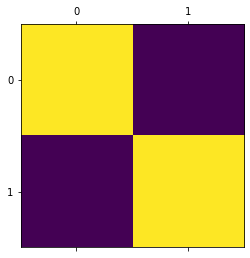

,NetCarbs,Data.Cholesterol
NetCarbs,1.000000,-0.210793
Data.Cholesterol,-0.210793,1.000000


In [28]:
Carbs_Cholesterol = df[["NetCarbs", "Data.Cholesterol"]]
plt.matshow(Carbs_Cholesterol.corr())
plt.show()
Carbs_Cholesterol.corr()

From the above correlation matrix we can say that there is slight negative correlation correlation between net carbs and Cholestrol

In [29]:
Food_NetCarbs = df[['Category','NetCarbs']] # creating new dataset as food_netcarbs 

# Checking foods with the Highest and lowest net carbs

In [30]:
A = Food_NetCarbs.groupby(by="Category").sum()
Food_NetCarbs_max = A.sort_values(by='NetCarbs',ascending=False)
Food_NetCarbs_max.head(10)

,NetCarbs
Category,
Cookie,5901.43
Bread,4749.08
Crackers,2841.38
Rice,2756.06
Pie,2674.79
Pretzels,2104.75
Potato,1738.97
Frankfurter or hot dog sandwich,1684.46
Popcorn,1559.13


From the above table we can see that Cookie, bread, Crackers, Rice, Pie, Pretzels, Potato, Frankfurter or hot dog sandwich, Roll, Cake or cupcake  are the highest net carbs foods

We can see that all high net carbs rich products belong to baked categories or are starchy foods with high carbohydrates

In [31]:
Food_NetCarbs_min = A.sort_values(by='NetCarbs',ascending=True)
Food_NetCarbs_min.head(10)

,NetCarbs
Category,
Meat,0.0
Bear,0.0
Venison/deer,0.0
Salt pork,0.0
Fat back,0.0
Venison/deer ribs,0.0
Chitterlings,0.0
Safflower oil,0.0
Shortening,0.0


From the above table we can see that Venison/deer ribs,Lamb hocks, Walnut oil,Olive oil, Fish stock,Opossum,Gizzard,Goat,Goat ribs and Goose are the lowest net carbs foods


We can also see that all the low net carbs products belong to organ meats with low cholestrol and fats

## Item 1: Table of average nutrient values

**Output:** : Average values of essential nutrients like Cholesterol, Protein, Fiber and Carbohydrates based on the category of food

**Business Case**: This table helps to give the range of nutrients within a particular food category and helps people with restricted diets in deciding their intake of foods within that category.

For example: Someone who's only allowed to take x amount of carbs in a day, can avoid a particular category of food if the minimum carbs of food in that category is below x


In [32]:
#Creating a table that uses groupby and agg to calculate stats of Cholesterol, Protein, Carbs and Fiber
tmp = df.groupby(['Category'], as_index= False).agg({"Data.Cholesterol":[mean, min, max], "Data.Protein":[mean, min, max], "Data.Carbohydrate":[mean, min, max], "Data.Fiber":[mean, min, max]})

#Sampling 10 values from the resulting table to view the output
tmp.sample(n=10, random_state=123)

Category Data.Cholesterol          \
                                                               mean min max   
574          Chicken or turkey soup with dumplings         5.000000   5   5   
1079                                   Hot peppers         2.000000   2   2   
649                                     Clementine         0.000000   0   0   
1547         Pork and vegetables including carrots        25.000000  19  29   
2053                                      Tortilla         0.000000   0   0   
440   Cereal (Quaker Cap'n Crunch's Crunchberries)         0.000000   0   0   
279                                        Burdock         2.000000   2   2   
304                                Caesar dressing        14.000000   1  39   
1652                 Rice cereal with mixed fruits         0.000000   0   0   
1640                                 Refried beans         1.666667   0   5   

     Data.Protein              Data.Carbohydrate               Data.Fiber  \
             mean   min    max              mean    min    max       mean   
574      3.090000  3.09   3.09          4.460000   4.46   4.46   0.800000   
1079     1.410000  1.41   1.41          7.720000   7.72   7.72   2.200000   
649      0.810000  0.81   0.81         13.340000  13.34  13.34   1.800000   
1547    10.006667  7.76  11.20          4.136667   3.14   4.79   1.500000   
2053     7.652500  5.70   9.76         46.730000  44.64  49.38   6.125000   
440      4.450000  4.45   4.45         85.930000  85.93  85.93   2.600000   
279      1.600000  1.60   1.60         18.060000  18.06  18.06   3.400000   
304      1.313333  0.30   2.17         17.543333   3.30  30.73   0.266667   
1652     6.600000  6.60   6.60         88.500000  88.50  88.50   2.600000   
1640     5.553333  4.98   6.70         14.460000  13.55  16.28   5.066667   

                
      min  max  
574   0.8  0.8  
1079  2.2  2.2  
649   1.8  1.8  
1547  1.3  1.7  
2053  3.5  9.8  
440   2.6  2.6  
279   3.4  3.4  
304   0.1  0.5  
1652  2.6  2.6  
1640  3.7  7.8

**Interpretation**

Chipotle dip, being available with protein content ranging from as low as 1.69 to as high as 7.93 units, seems to be one of the food items with a bigger range of options - and hence can be a more suitable choice of food for a broad range of consumers with varying needs


## Item 2: Unigrams and Bigrams within High Cholesterol foods

**Output:** : Plots containing unigrams and bigrams of most frequently found words within descriptions of relatively high cholesterol food products

**Business Case**: This plot helps consumers make right choices by indicating labels that are usually associated with high cholesterol foods.

In [33]:
#Creating a function to pre-process or clean the text present in the Description column

def string_clean(text):
  #using regex to extract the individual words from the column
  text = re.sub(r'[^\w\s%]', '', str(text).lower().strip())
  text = text.split()
  #Taking care of stopwords like 'or', 'and' etc, by using nltk stopwords libary
  lst_stopwords = nltk.corpus.stopwords.words("english")
  text = [word for word in text if word not in lst_stopwords]
  #Lemmatizing the words to derive root words
  lem=nltk.stem.wordnet.WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text]
  text = " ".join(text)
  return text


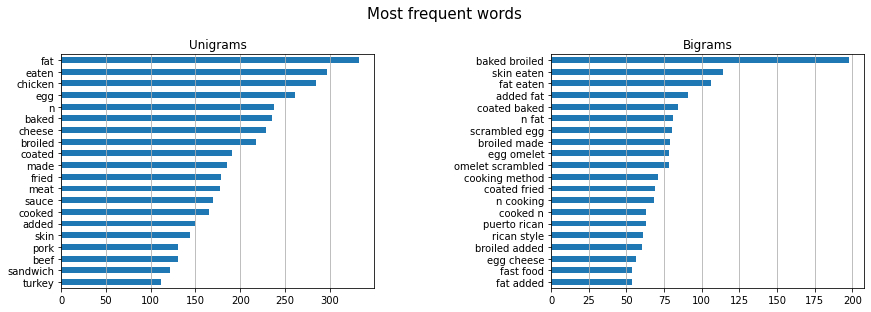

In [34]:
#Creating a copy of the dataset for the purpose of this visualization
tmp = df.copy()

#Turning the cholesterol column into a binary variable by modifying the column based on the mean value of overall cholesterol values in the column
tmp.loc[tmp['Data.Cholesterol'] > tmp['Data.Cholesterol'].mean(), 'Higher_Cholesterol'] = 1
tmp.loc[tmp['Data.Cholesterol'] < tmp['Data.Cholesterol'].mean(), 'Higher_Cholesterol'] = 0

#Applying the user-defined string_clean function
tmp['clean_description'] = tmp['Description'].apply(lambda x : string_clean(x))
High_C = tmp[tmp['Higher_Cholesterol'] == 1]['clean_description'].str.cat(sep=' ')

#Creating a corpus and tokenzing
corpus = tmp[tmp['Higher_Cholesterol']==1]["clean_description"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

#Creating subplots for the final output
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
#allocating enough space between two plots
fig.tight_layout(pad=4.0)
fig.set_figwidth(15)
fig.set_figheight(5)

#Unigram
#Creating a frequency distribution of the words using nltk
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
#Sorting to find the top 20 most used values
dtf_uni.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
#Bigram
#Creating a frequency distribution of the words using nltk, using two words at a time
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
#Sorting to find the top 20 most used values
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

**Interpretation**

Words like fat, chicken, egg(unigrams) and baked broiled, skin eaten, added fat (in bigrams) are generally associated with higher cholesterol food items


## Item 3: Barplot of Beverages with High Cholesterol

**Output:** : Barplot consisting of top 10 beverage catgories with highest cholesterol amounts

**Business Case**: This table helps regular consumers of caffiene, tea, and other non-alcoholic beverages to determine what foods to avoid in the case of a low cholesterol food diet



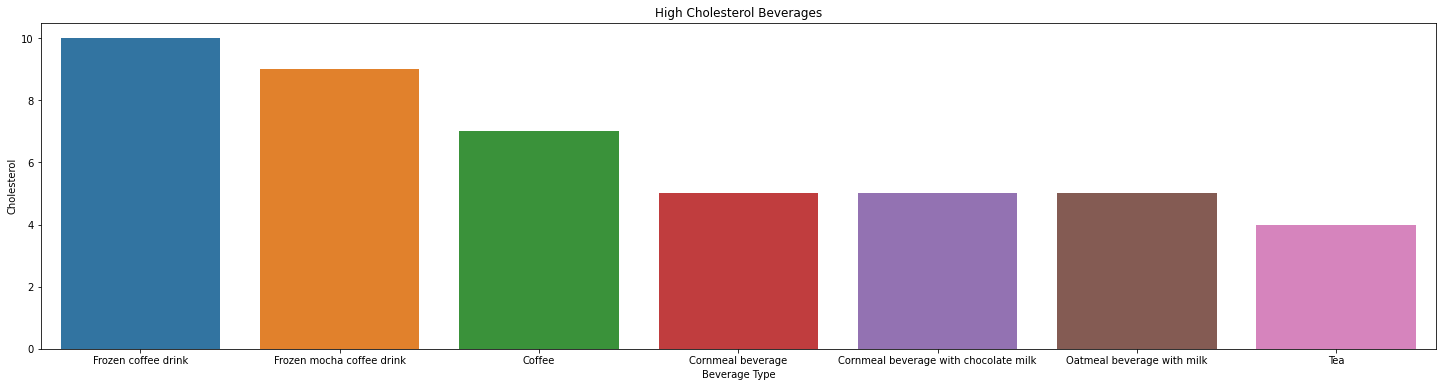

In [35]:
#From the documentation, and by looking at the dataset, we can determine that
#the Nutrient Number for non-alcoholic beverages lies between 92100000 and 92900300 
#Grouping the data by the category and taking the maximum cholesterol vaue from the category as the value to compare
beverages_df = df[(df['Nutrient Data Bank Number']>92100000) & (df['Nutrient Data Bank Number']<92900300)].groupby(['Category'], as_index=False).max(numeric_only=False).copy()

#sorting and taking top 7 values of interest
beverages_df = beverages_df.sort_values(by = 'Data.Cholesterol', ascending = False).iloc[:7, :]

#Creating a plot with appropriate titles and labels
plt.figure(figsize = (25, 6))
sns.barplot(x="Category", y="Data.Cholesterol", data=beverages_df)
plt.ylabel('Cholesterol')
plt.xlabel('Beverage Type')
plt.title('High Cholesterol Beverages')
plt.show()

**Interpretation**

Frozen Coffee drink contains the highest amount of cholesterol content with a steady decline among rest of the categories and Tea being the beverage with the least cholesterol content in the top seven

## Item 4: Table with Highest Cholesterol food categories

**Output:** : Table consisting of top 20 food catgories with highest avergae cholesterol amounts

**Business Case**: This table helps give an overall view of high cholesterol food items in average


In [36]:
#Creating a dataset, group by Category, with their respective averages, and sorting them in descending order
tmp = df.groupby(['Category'], as_index= False).agg({"Data.Cholesterol": "mean"}).sort_values(by='Data.Cholesterol', ascending = False)

#Displaying the top 20 categories
tmp.iloc[:20]

,Category,Data.Cholesterol
242,Brains,3074.000000
248,Breaded brains,1691.000000
1610,Quail egg,841.000000
786,Duck egg,828.000000
977,Goose egg,798.000000
1116,Kidney,710.000000
1676,Roe,522.500000
1798,Shrimp-egg patty,495.000000
530,Chicken liver,475.000000
1062,Hollandaise sauce,454.000000


**Interpretation**

Most of the high cholesterol food is accounted by one or the other kind of meat, with a few exceptions like 	Hollandaise sauce	

## Item 5: Word Cloud in Milk Category

**Output:** : Word Clouds of words common in both - high and low cholesterol foods

**Business Case**: Milk consumers can refer to this word cloud to determine what labels to stay away from vs what labels are probably associated with their diet habits


In [37]:
#Trying to identify milk category rows
df[df['Category'].str.contains('milk', case = False, na = False)]['Category'].unique()

array(['Almond milk', 'Chocolate milk', 'Rice milk', 'Milk',
       'MILKY WAY MIDNIGHT Bar', 'MILKY WAY Bar', 'Strawberry milk',
       'Oatmeal beverage with milk', "Nutrition bar (Tiger's Milk)",
       'Milk chocolate candy', 'Milk shake', 'Soy milk', 'Buttermilk',
       "Goat's milk", "M&M's Milk Chocolate Candies",
       'Chocolate milk drink', 'Cornmeal beverage with chocolate milk',
       "Milk 'n Cereal bar", 'Coconut milk', 'Milk shake with malt',
       'Nutritional powder mix (Muscle Milk)', 'Non-dairy milk'],
      dtype=object)

In [38]:
#create a new table with milk rows that are apt in our analysis
milk_df = df[df['Category'].isin(['Milk', 'Buttermilk', "Goat's milk", 'Non-dairy milk', 'Soy milk',
      'Almond milk', 'Rice milk', 'Coconut milk', 'Chocolate milk',
      'Strawberry milk'])][['Category', 'Description', 'Data.Cholesterol']].copy()

#Assigning 'high/low cholesterol' labels based on the mean of the column
milk_df.loc[milk_df['Data.Cholesterol'] > milk_df['Data.Cholesterol'].mean(), 'Higher_Cholesterol'] = 1
milk_df.loc[milk_df['Data.Cholesterol'] < milk_df['Data.Cholesterol'].mean(), 'Higher_Cholesterol'] = 0
milk_df.head()

,Category,Description,Data.Cholesterol,Higher_Cholesterol
40,Almond milk,"Almond milk, unsweetened",0,0.0
112,Chocolate milk,"Chocolate milk, made from dry mix, NS as to ty...",8,1.0
122,Chocolate milk,"Chocolate milk, made from reduced sugar mix wi...",3,0.0
134,Chocolate milk,"Chocolate milk, made from no sugar added dry m...",3,0.0
147,Chocolate milk,"Chocolate milk, made from light syrup with non...",0,0.0


In [39]:
#Checking the work
milk_df['Category'].value_counts()

Chocolate milk     45
Milk               28
Soy milk            6
Strawberry milk     5
Buttermilk          4
Almond milk         3
Coconut milk        2
Rice milk           1
Goat's milk         1
Non-dairy milk      1
Name: Category, dtype: int64

In [40]:
#applying the user-defined function to the dataset to create a new column that consists of the pre-processed description 
milk_df['clean_description'] = milk_df['Description'].apply(lambda x : string_clean(x))

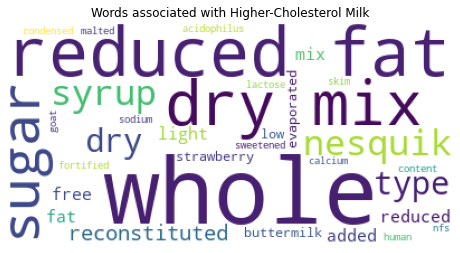

In [41]:
#High- Cholesterol
High_C = milk_df[milk_df['Higher_Cholesterol'] == 1]['clean_description'].str.cat(sep=' ')

#Excluding words like milk from the wordcloud as it doesn't help our analysis
#Excluding chocolate as there's a very high count of chocolate category milk resulting in the word appearing too many times
exclude = ['milk','made','from', 'chocolate']
wc = wordcloud.WordCloud(stopwords = exclude, background_color='white', max_words=100, random_state=42)
wc = wc.generate(High_C)
fig = plt.figure(figsize = (8,8))
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.title("Words associated with Higher-Cholesterol Milk")
plt.show()

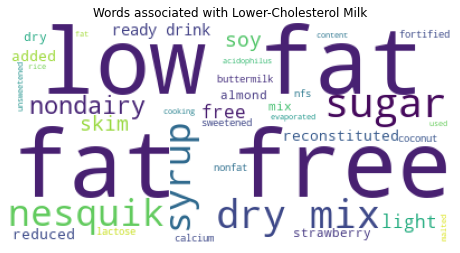

In [42]:
#Low - Cholesterol
Low_C = milk_df[milk_df['Higher_Cholesterol'] == 0]['clean_description'].str.cat(sep=' ')

#Excluding words like milk from the wordcloud as it doesn't help our analysis
#Excluding chocolate as there's a very high count of chocolate category milk resulting in the word appearing too many times
exclude = ['milk','made','from', 'chocolate']
wc = wordcloud.WordCloud(stopwords = exclude, background_color='white', max_words=100, random_state=42)
wc = wc.generate(Low_C)
fig = plt.figure(figsize = (8,8))
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.title("Words associated with Lower-Cholesterol Milk")
plt.show()

**Interpretation**

Some of the words associated with higher cholesterol milk include whole, dry mix, sugar and reduced fat. 

Words associated with lower cholesterol milk include fat-free, low fat, nondiary, syrup

## Item 6: 3d Scatterplot

**Output:** : 3D scatterplot to give a high level view of the nutrient distribution among the food categories

**Business Case**: The scatterplot helps give a bird's eye view of the ditribution of food categories which can be used to understand the common nutrient patterns

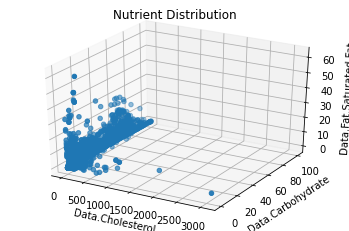

In [43]:
#Creating a plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

#Assigning cholesterol, carbohydrates and fats for the three axes
x = df['Data.Cholesterol']
y = df['Data.Carbohydrate']
z = df['Data.Fat.Saturated Fat']

#Creating a scatterplot with appropriate titles and labels
ax.scatter(x, y, z)
ax.set_title("Nutrient Distribution")
ax.set_xlabel("Data.Cholesterol")
ax.set_ylabel("Data.Carbohydrate")
ax.set_zlabel("Data.Fat.Saturated Fat")
plt.show()

**Interpretation**

Most of the data is concentrated within a close range of values, with a few large outliers in Cholesterol and Saturated Fats

In [44]:
import random
import numpy as np
random.seed(5)
df=pd.DataFrame(df)
train, validate, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])
X_train_meta = train.head(10)
X_test_meta = test.head(10)
df_metadata = df[['Category','Description','Nutrient Data Bank Number']]

# Modeling (Regression) 

## Model 1


In [45]:
# Import scikit learn module as need
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
random.seed(5)
# Seperating X and Y, X is all the variables used to predict Y(which is the predictor variable)
X = df.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number','Data.Cholesterol'])
y = df['Data.Cholesterol']

In [47]:
#splitting the train data and also splitting in remaing for later
X_train, X_rem, y_train, y_rem, Xtrain_meta, Xrem_meta = train_test_split(X, y, df_metadata, train_size=0.8)

# Splitting the remaining data into validation and test
X_valid, X_test, y_valid, y_test, Xvalid_meta, Xtest_meta = train_test_split(X_rem, y_rem, Xrem_meta, test_size=0.5)

print(X_train.shape,
y_test.shape,
Xtest_meta.shape)

(5100, 35) (638,) (638, 3)


In [48]:
# Converting the train valid test into arrays
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [49]:
# having a scaler, to have scaling data, 0 to 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [50]:
from sklearn.linear_model import LinearRegression
# creating the linear regression model
LR = LinearRegression()
# fitting the model
LR = LR.fit(X_train, y_train)

In [51]:
# storing the predictions and calculating the score
train_predictions = LR.predict(X_train)
test_predictions = LR.predict(X_test)
valid_predictions = LR.predict(X_valid)
LR.score(X_train,y_train)

0.6817589108066409

## Model 2
### PCA preprocessing

In [52]:
df_metadata2 = df[['Category','Description','Nutrient Data Bank Number']] #defining metadata before splitting

In [53]:
random.seed(5)
# Seperating X and Y, X is all the variables used to predict Y(which is the predictor variable)
X2 = df.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number','Data.Cholesterol'])
y2 = df['Data.Cholesterol']

In [54]:
#splitting the train data and also splitting in remaing for later
X_train_pca, X_rem_pca, y_train_pca, y_rem_pca, Xtrain_meta_pca, Xrem_meta_pca = train_test_split(X2, y2, df_metadata2, train_size=0.8)

# Splitting the remaining data into validation and test
X_valid_pca, X_test_pca, y_valid_pca, y_test_pca, Xvalid_meta_pca, Xtest_meta_pca = train_test_split(X_rem_pca, y_rem_pca, Xrem_meta_pca, test_size=0.5)

print(X_train_pca.shape,
y_test_pca.shape,
Xtest_meta_pca.shape)

(5100, 35) (638,) (638, 3)


In [55]:
#converting the arrays to pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
X_valid_pca = pca.transform(X_valid_pca)

print(X_train_pca.shape,
y_test_pca.shape,
Xtest_meta_pca.shape)

(5100, 5) (638,) (638, 3)


In [56]:
y_train_pca = y_train
y_test_pca = y_test
y_valid_pca = y_valid


In [57]:
from sklearn.ensemble import RandomForestRegressor # RFR

In [58]:
clf_pca = RandomForestRegressor()
clf_pca = clf_pca.fit(X_train_pca, y_train_pca)

# storing the predictions
train_pred_pca = clf_pca.predict(X_train_pca) 
test_pred_pca = clf_pca.predict(X_test_pca)
valid_pred_pca =clf_pca.predict(X_valid_pca)
clf_pca.score(X_train_pca, y_train_pca)

0.7697068343476534

## Model 3

In [59]:
df_3 = df.drop(df[df['Data.Cholesterol'] == 0].index)
print(df_3.shape)

(4186, 39)


In [60]:
df_metadata3 = df_3[['Category', 'Description', 'Nutrient Data Bank Number']]
# storing the metadata

In [61]:
X3 = df_3.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number','Data.Cholesterol'])
y3 = df_3['Data.Cholesterol']
y3.shape

# splitting the data in x and ye

(4186,)

In [62]:
#splitting the train data and also splitting in remaing for later
X_train3, X_rem3, y_train3, y_rem3, Xtrain_meta3, Xrem_meta3 = train_test_split(X3, y3, df_metadata3, train_size=0.8)

# Splitting the remaining data into validation and test
X_valid3, X_test3, y_valid3, y_test3, Xvalid_meta3, Xtest_meta3 = train_test_split(X_rem3, y_rem3, Xrem_meta3, test_size=0.5)

print(X_train3.shape,
y_test3.shape,
Xtest_meta3.shape)

(3348, 35) (419,) (419, 3)


In [63]:
#converting to arrays

X_train3 = np.array(X_train3)
X_valid3 = np.array(X_valid3)
X_test3 = np.array(X_test3)
y_train3 = np.array(y_train3)
y_valid3 = np.array(y_valid3)
y_test3 = np.array(y_test3)

In [64]:
# scaling the data
scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)
X_valid3 = scaler.transform(X_valid3)

In [65]:
LR = LinearRegression()
# fitting the model
LR = LR.fit(X_train3, y_train3)

In [66]:
# storing predictions and score
train_predictions3 = LR.predict(X_train3)
test_predictions3 = LR.predict(X_test3)
valid_predictions3 = LR.predict(X_valid3)
LR.score(X_train3,y_train3)

0.7679138530864287

## Model 4

In [67]:
df_4 = df.drop(df[df['Data.Cholesterol'] == 0].index)
# defining the df for model 4

In [68]:
df_metadata4 = df_4[['Category', 'Description', 'Nutrient Data Bank Number']]
#saving the metadata

In [69]:
X4 = df_4.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number','Data.Cholesterol'])
y4 = df_4['Data.Cholesterol']

# splitting and X and Y

In [70]:
#splitting the train data and also splitting in remaing for later
X_train4, X_rem4, y_train4, y_rem4, Xtrain_meta4, Xrem_meta4 = train_test_split(X4, y4, df_metadata4, train_size=0.8)

# Splitting the remaining data into validation and test
X_valid4, X_test4, y_valid4, y_test4, Xvalid_meta4, Xtest_meta4 = train_test_split(X_rem4, y_rem4, Xrem_meta4, test_size=0.5)

print(X_train4.shape,
y_test4.shape,
Xtest_meta4.shape)

(3348, 35) (419,) (419, 3)


In [71]:
#converting to arrays

X_train4 = np.array(X_train4)
X_valid4 = np.array(X_valid4)
X_test4 = np.array(X_test4)
y_train4 = np.array(y_train4)
y_valid4 = np.array(y_valid4)
y_test4 = np.array(y_test4)

In [72]:
#converting for PCA, 
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) 
X_train_pca4 = pca.fit_transform(X_train4)
X_valid_pca4 = pca.transform(X_valid4)
X_test_pca4 = pca.transform(X_valid4)

In [73]:
X_valid_pca4 = pd.DataFrame(X_valid_pca4)
print(X_valid_pca4.shape)
X_valid_pca4.head()

(419, 5)


,0,1,2,3,4
0,-247.681151,-338.046881,-35.743569,-292.782825,22.114500
1,-248.022528,-337.894606,-29.375140,-329.021403,45.604833
2,-236.836017,-335.582900,-62.554901,194.067733,-94.373228
3,-399.384799,4265.921678,-121.416496,-52.562671,-16.806025
4,-260.627060,-338.109582,-48.906113,27.874526,-41.217223


In [74]:
X_train_pca4 = pd.DataFrame(X_train_pca4)
print(X_train_pca4.shape)
X_train_pca4.head()

(3348, 5)


,0,1,2,3,4
0,-333.598840,1312.562923,-96.390053,318.784405,-90.779231
1,-235.278091,-334.248948,-31.283988,-286.818684,-44.191724
2,-248.247178,-337.339615,-27.813019,-357.603374,41.986892
3,-262.722157,-339.059027,-49.571237,76.421501,-13.020255
4,-235.659020,-334.346144,-20.479661,-167.829759,7.567020


In [75]:
y_train_pca4 = y_train4
y_test_pca4 = y_test4
y_valid_pca4 = y_valid4

y_test_pca4 = y_test_pca4

In [76]:
X_test_pca4 = pd.DataFrame(X_test_pca4)
print(X_test_pca4.shape)
X_test_pca4.head()

(419, 5)


,0,1,2,3,4
0,-247.681151,-338.046881,-35.743569,-292.782825,22.114500
1,-248.022528,-337.894606,-29.375140,-329.021403,45.604833
2,-236.836017,-335.582900,-62.554901,194.067733,-94.373228
3,-399.384799,4265.921678,-121.416496,-52.562671,-16.806025
4,-260.627060,-338.109582,-48.906113,27.874526,-41.217223


In [77]:
LR_pca = RandomForestRegressor()
LR_pca = LR_pca.fit(X_train_pca4, y_train_pca4)

# store the predictions
train_pred_pca4 = LR_pca.predict(X_train_pca4) 
test_pred_pca4 = LR_pca.predict(X_test_pca4) 
valid_pred_pca4 = LR_pca.predict(X_valid_pca4)
LR_pca.score(X_train_pca4, y_train_pca4)

0.9281324616040298

# Analyze and interpret regression errors


In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
# 2) r2 - model 1
trainr2_1 = r2_score(y_train, train_predictions)
print("This is trainr2 (1):", trainr2_1) # train
testr2_1 = r2_score(y_test, test_predictions)
print("This is testr2 (1):", testr2_1) # test
validr2_1 = r2_score(y_valid,valid_predictions)
print("This is validr2 (1):", validr2_1)

# 2) r2 - model 2
trainr2_pca2 = r2_score(y_train_pca, train_pred_pca)
print("This is trainr2 (pca2):", trainr2_pca2) # train
testr2_pca2 = r2_score(y_test_pca, test_pred_pca)
print("This is testr2 (pca2):", testr2_pca2) # test
validr2_pca2 = r2_score(y_valid_pca, valid_pred_pca)
print("This is validr2 (pca2):", validr2_pca2) # valid

# r2 model 3
trainr2_3 = r2_score(y_train3, train_predictions3)
print("This is trainr2 (3):", trainr2_3) # train
testr2_3 = r2_score(y_test3, test_predictions3)
print("This is testr2 (3):", testr2_3) # test
validr2_3 = r2_score(y_valid3,valid_predictions3)
print("This is validr2(3):", validr2_3)

# r2 - model 4
trainr2_pca4 = r2_score(y_train_pca4, train_pred_pca4)
print("This is trainr2 (pca4):", trainr2_pca4) # train
testr2_pca4 = r2_score(y_test_pca4, test_pred_pca4)
print("This is testr2 (pca4):", testr2_pca4) # test
validr2_pca4 = r2_score(y_valid_pca4, valid_pred_pca4)
print("This is validr2 (pca4):", validr2_pca4) # valid



This is trainr2 (1): 0.6817589108066409
This is testr2 (1): 0.6509546660609946
This is validr2 (1): 0.8708406640151576
This is trainr2 (pca2): 0.7697068343476534
This is testr2 (pca2): -0.10812943008760367
This is validr2 (pca2): -0.15215433251047106
This is trainr2 (3): 0.7679138530864287
This is testr2 (3): 0.49062361852663283
This is validr2(3): 0.9121756854000153
This is trainr2 (pca4): 0.9281324616040298
This is testr2 (pca4): -0.9523169855497449
This is validr2 (pca4): 0.8305284021390209


### Model 3 seems to have the best r2 score and seems to have a good fit. Others may be affected by Overestimating

In [80]:
# 2) mae - model
trainMAE_1 = mean_absolute_error(y_train, train_predictions)
print("This is trainMAE (1):", trainMAE_1) # train
testMAE_1 = mean_absolute_error(y_test, test_predictions)
print("This is testMAE (1):", testMAE_1) # test
validMAE_1 = mean_absolute_error(y_valid,valid_predictions)
print("This is validMAE (1):", validMAE_1)

# 2) mae - model 2
trainMAE_pca2 = mean_absolute_error(y_train_pca, train_pred_pca)
print("This is trainMAE (pca2):", trainMAE_pca2) # train
testMAE_pca2 = mean_absolute_error(y_test_pca, test_pred_pca)
print("This is testMAE (pca2):", testMAE_pca2) # test
validMAE_pca2 = mean_absolute_error(y_valid_pca, valid_pred_pca)
print("This is validMAE (pca2):", validMAE_pca2) # valid

# mae model 3
trainMAE_3 = mean_absolute_error(y_train3, train_predictions3)
print("This is trainMAE (3):", trainMAE_3) # train
testMAE_3 = mean_absolute_error(y_test3, test_predictions3)
print("This is testMAE (3):", testMAE_3) # test
validMAE_3 = mean_absolute_error(y_valid3,valid_predictions3)
print("This is validMAE (3):", validMAE_3)

# mae - model 4
trainMAE_pca4 = mean_absolute_error(y_train_pca4, train_pred_pca4)
print("This is trainMAE (pca4):", trainMAE_pca4) # train
testMAE_pca4 = mean_absolute_error(y_test_pca4, test_pred_pca4)
print("This is testMAE (pca4):", testMAE_pca4) # test
validMAE_pca4 = mean_absolute_error(y_valid_pca4, valid_pred_pca4)
print("This is validMAE (pca4):", validMAE_pca4) # valid



This is trainMAE (1): 16.210627345627305
This is testMAE (1): 15.666936874464463
This is validMAE (1): 14.167975931790691
This is trainMAE (pca2): 18.731195879050144
This is testMAE (pca2): 46.080341542426574
This is validMAE (pca2): 41.520128087157914
This is trainMAE (3): 16.920657464510846
This is testMAE (3): 22.45909897424232
This is validMAE (3): 15.319167774039972
This is trainMAE (pca4): 7.052753882915174
This is testMAE (pca4): 58.65532219570406
This is validMAE (pca4): 17.707732696897374


#### MOdel 3 seems to have the lowest MAE, so it looks like it has the best error margin

In [81]:
# Mean Squared Error
#MSE- model 1
trainMSE1 = mean_squared_error(y_train, train_predictions)
print("This is trainMSE (1):", trainMSE1) # train
testMSE1 = mean_squared_error(y_test, test_predictions)
print("This is testMSE (1):", testMSE1) # test
validMSE1 = mean_squared_error(y_valid, valid_predictions)
print("This is validMSE (1):", validMSE1) # valid


#MSE- model 2
trainMSE2 = mean_squared_error(y_train_pca, train_pred_pca)
print("This is trainMSE (2):", trainMSE2) # train
testMSE2 = mean_squared_error(y_test_pca, test_pred_pca)
print("This is testMSE (2):", testMSE2) # test
validMSE2 = mean_squared_error(y_valid_pca, valid_pred_pca)
print("This is validMSE (2):", validMSE2) # valid

#MSE- model 3
trainMSE3 = mean_squared_error(y_train3, train_predictions3)
print("This is trainMSE (3):", trainMSE3) # train
testMSE3 = mean_squared_error(y_test3, test_predictions3)
print("This is testMSE (3):", testMSE3) # test
validMSE3 = mean_squared_error(y_valid3, valid_predictions3)
print("This is validMSE (3):", validMSE3) # valid

#MSE- model 4
trainMSE4 = mean_squared_error(y_train_pca4, train_pred_pca4)
print("This is trainMSE (4):", trainMSE4) # train
testMSE4 = mean_squared_error(y_test_pca4, test_pred_pca4)
print("This is testMSE (4):", testMSE4) # test
validMSE4 = mean_squared_error(y_valid_pca4, valid_pred_pca4)
print("This is validMSE (4):", validMSE4) # valid

This is trainMSE (1): 1906.5446337713352
This is testMSE (1): 3325.0004290511806
This is validMSE (1): 604.6423530989417
This is trainMSE (2): 1379.659051197895
This is testMSE (2): 10556.023737390466
This is validMSE (2): 5393.658162070657
This is trainMSE (3): 1466.5286069175138
This is testMSE (3): 14630.512369563865
This is validMSE (3): 490.4326115216756
This is trainMSE (4): 649.0704734767027
This is testMSE (4): 11088.622470644392
This is validMSE (4): 1190.2719217183771


### Model 3 seems to have the lowest MSE, so it would be best

In [82]:
import seaborn as sns

## Scatter PLot MOdel 1

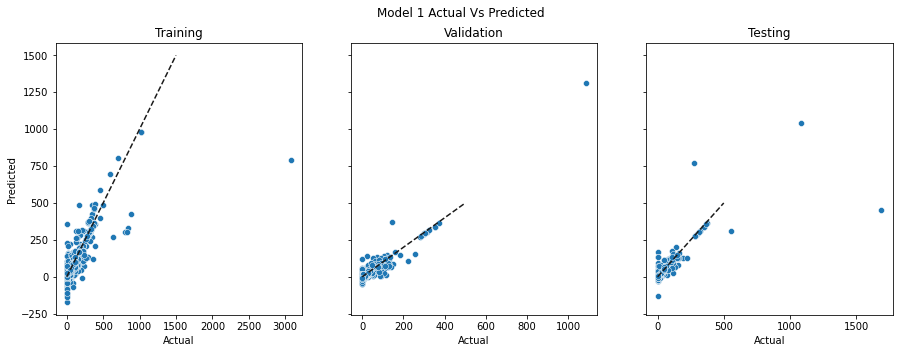

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) 
fig.suptitle('Model 1 Actual Vs Predicted')
sns.set(style="whitegrid")

#Training
sns.scatterplot(ax=axes[0], 
            x= y_train, 
            y= train_predictions)

#Validation
sns.scatterplot(ax=axes[1], 
            x=y_valid,
             y=valid_predictions)

#Test
sns.scatterplot(ax=axes[2],
                x=y_test,
                y=test_predictions)

#Titles
axes[0].set_title('Training')
axes[1].set_title('Validation')
axes[2].set_title('Testing')

#xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')
axes[2].set_xlabel('Actual')

#ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')
axes[2].set_ylabel('Predicted')

#(Fit Lines)
axes[0].plot([0, 1500], [0, 1500], '--k')
axes[1].plot([0, 500], [0, 500], '--k') 
axes[2].plot([0, 500], [0, 500], '--k')

plt.show()

## Model 1 metadata added

In [84]:
Xtest_meta.shape, y_test.shape

((638, 3), (638,))

In [85]:
# meta data, resetting index for the combining of data
Xtest_meta.reset_index(drop=True, inplace=True)
y_test = pd.DataFrame(y_test, columns=['y_test'])
y_test.reset_index(drop=True, inplace=True)
test_predictions = pd.DataFrame(test_predictions, columns=['test_predictions'])
test_predictions.reset_index(drop=True, inplace=True)

In [86]:
#concatenating the data to add back the metadata columns
df_combine = pd.concat([Xtest_meta, y_test,test_predictions], axis=1)
df_combine

,Category,Description,Nutrient Data Bank Number,y_test,test_predictions
0,Infant formula,"Infant formula, liquid concentrate, made with ...",11720312,0,15.608775
1,Chocolate,"Chocolate, white, with almonds",91705410,18,51.546275
2,Apple juice,"Apple juice, baby food",67202000,0,-2.078725
3,Ground beef with tomato sauce and taco seasoni...,Ground beef with tomato sauce and taco seasoni...,58101800,38,26.421275
4,Sandwich,"Sandwich, NFS",27500050,31,34.796275
...,...,...,...,...,...
633,Crackers,"Crackers, butter, reduced sodium",54200100,0,9.046275
634,Potato,"Potato, french fries, from frozen, fried",71401032,0,15.296275
635,Rice with onions,"Rice with onions, Puerto Rican style",58156410,0,0.546275
636,Green banana,"Green banana, cooked in salt water",71910110,0,-9.953725


In [87]:
df_combine['residuals'] = df_combine['test_predictions'] - df_combine['y_test']
df_combine

,Category,Description,Nutrient Data Bank Number,y_test,test_predictions,residuals
0,Infant formula,"Infant formula, liquid concentrate, made with ...",11720312,0,15.608775,15.608775
1,Chocolate,"Chocolate, white, with almonds",91705410,18,51.546275,33.546275
2,Apple juice,"Apple juice, baby food",67202000,0,-2.078725,-2.078725
3,Ground beef with tomato sauce and taco seasoni...,Ground beef with tomato sauce and taco seasoni...,58101800,38,26.421275,-11.578725
4,Sandwich,"Sandwich, NFS",27500050,31,34.796275,3.796275
...,...,...,...,...,...,...
633,Crackers,"Crackers, butter, reduced sodium",54200100,0,9.046275,9.046275
634,Potato,"Potato, french fries, from frozen, fried",71401032,0,15.296275,15.296275
635,Rice with onions,"Rice with onions, Puerto Rican style",58156410,0,0.546275,0.546275
636,Green banana,"Green banana, cooked in salt water",71910110,0,-9.953725,-9.953725


In [88]:

df_combine.iloc[[df_combine["residuals"].abs().idxmax()]]

# For Coconut oil, the the model is overestimating

,Category,Description,Nutrient Data Bank Number,y_test,test_predictions,residuals
481,Breaded brains,"Breaded brains, Puerto Rican style",27261000,1691,455.296275,-1235.703725


In [89]:
df_combine.iloc[[df_combine["test_predictions"].idxmin()]]
# For tea it is predicting negative most

,Category,Description,Nutrient Data Bank Number,y_test,test_predictions,residuals
571,Yeast,Yeast,75236000,0,-127.578725,-127.578725


## Scatterplot Model 2

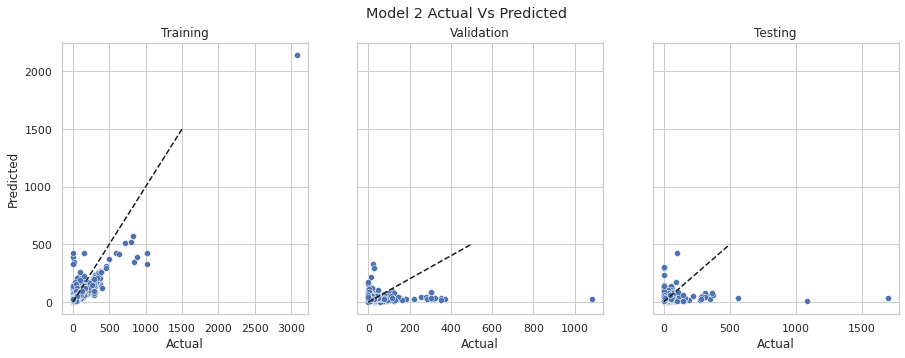

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('Model 2 Actual Vs Predicted')
sns.set(style="whitegrid")

#Training
sns.scatterplot(ax=axes[0], 
            x= y_train_pca, 
            y= train_pred_pca)

#Validation
sns.scatterplot(ax=axes[1], 
            x=y_valid_pca,
             y=valid_pred_pca)

#Test
sns.scatterplot(ax=axes[2],
                x=y_test_pca,
                y=test_pred_pca)

#Titles
axes[0].set_title('Training')
axes[1].set_title('Validation')
axes[2].set_title('Testing')

#xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')
axes[2].set_xlabel('Actual')

#ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')
axes[2].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 1500], [0, 1500], '--k')
axes[1].plot([0, 500], [0, 500], '--k') 
axes[2].plot([0, 500], [0, 500], '--k')

plt.show()

## Model 2 metadata

In [91]:
# meta data, resetting index for the combining of data
Xtest_meta.reset_index(drop=True, inplace=True)
y_test_pca = pd.DataFrame(y_test_pca, columns=['y_test_pca'])
y_test_pca.reset_index(drop=True, inplace=True)
test_pred_pca = pd.DataFrame(test_pred_pca, columns=['test_pred_pca'])
test_pred_pca.reset_index(drop=True, inplace=True)

In [92]:
#concatenating the data to add back the metadata columns

df_combine2 = pd.concat([Xtest_meta, y_test_pca,test_pred_pca], axis=1)
df_combine2.head(10)

,Category,Description,Nutrient Data Bank Number,y_test_pca,test_pred_pca
0,Infant formula,"Infant formula, liquid concentrate, made with ...",11720312,0,37.999167
1,Chocolate,"Chocolate, white, with almonds",91705410,18,132.240000
2,Apple juice,"Apple juice, baby food",67202000,0,20.626667
3,Ground beef with tomato sauce and taco seasoni...,Ground beef with tomato sauce and taco seasoni...,58101800,38,40.622167
4,Sandwich,"Sandwich, NFS",27500050,31,24.276667
5,Cookie,"Cookie, chocolate, made with oatmeal and cocon...",53206550,0,39.836667
6,Milk,"Milk, dry, reconstituted, whole",11121100,15,35.733333
7,Potato,"Potato, scalloped, ready-to-heat, with meat",71305080,31,45.501500
8,Almond paste,Almond paste,42200600,0,17.598333
9,Cereal (General Mills Chex Corn),Cereal (General Mills Chex Corn),57132000,0,27.318000


In [93]:
df_combine2['residuals'] = df_combine2['test_pred_pca'] - df_combine2['y_test_pca']
df_combine2

,Category,Description,Nutrient Data Bank Number,y_test_pca,test_pred_pca,residuals
0,Infant formula,"Infant formula, liquid concentrate, made with ...",11720312,0,37.999167,37.999167
1,Chocolate,"Chocolate, white, with almonds",91705410,18,132.240000,114.240000
2,Apple juice,"Apple juice, baby food",67202000,0,20.626667,20.626667
3,Ground beef with tomato sauce and taco seasoni...,Ground beef with tomato sauce and taco seasoni...,58101800,38,40.622167,2.622167
4,Sandwich,"Sandwich, NFS",27500050,31,24.276667,-6.723333
...,...,...,...,...,...,...
633,Crackers,"Crackers, butter, reduced sodium",54200100,0,30.845000,30.845000
634,Potato,"Potato, french fries, from frozen, fried",71401032,0,10.972500,10.972500
635,Rice with onions,"Rice with onions, Puerto Rican style",58156410,0,26.957667,26.957667
636,Green banana,"Green banana, cooked in salt water",71910110,0,45.740000,45.740000


In [94]:
df_combine2.iloc[[df_combine2["residuals"].abs().idxmax()]]

# herring is quite, it is overestimating

,Category,Description,Nutrient Data Bank Number,y_test_pca,test_pred_pca,residuals
481,Breaded brains,"Breaded brains, Puerto Rican style",27261000,1691,33.504667,-1657.495333


In [95]:
df_combine2.iloc[[df_combine2["test_pred_pca"].idxmin()]]
# For potato salad it is predicting negative most

,Category,Description,Nutrient Data Bank Number,y_test_pca,test_pred_pca,residuals
93,Cherries,"Cherries, raw",63115010,0,1.326667,1.326667


## SCatterplot Model 3

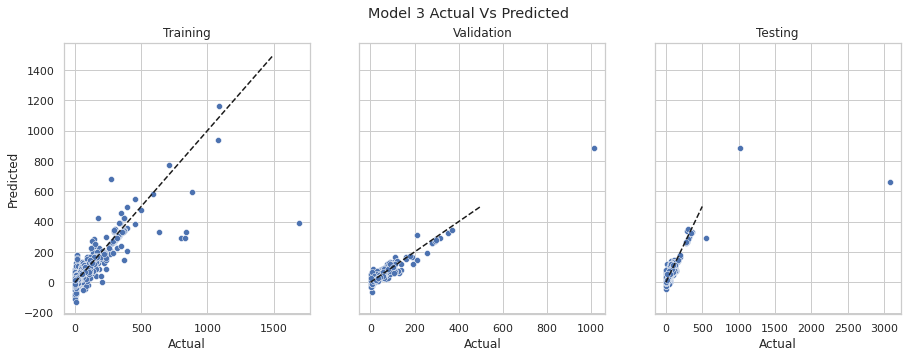

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('Model 3 Actual Vs Predicted')
sns.set(style="whitegrid")

#Training
sns.scatterplot(ax=axes[0], 
            x= y_train3, 
            y= train_predictions3)

#Validation
sns.scatterplot(ax=axes[1], 
            x=y_valid3,
             y=valid_predictions3)

#Test
sns.scatterplot(ax=axes[2],
                x=y_test3,
                y=test_predictions3)

#Titles
axes[0].set_title('Training')
axes[1].set_title('Validation')
axes[2].set_title('Testing')

#xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')
axes[2].set_xlabel('Actual')

#ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')
axes[2].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 1500], [0, 1500], '--k')
axes[1].plot([0, 500], [0, 500], '--k') 
axes[2].plot([0, 500], [0, 500], '--k')

plt.show()

## Model 3 metadata

In [97]:
# meta data, resetting index for the combining of data

Xtest_meta3.reset_index(drop=True, inplace=True)
y_test3 = pd.DataFrame(y_test3, columns=['y_test3'])
y_test3.reset_index(drop=True, inplace=True)
test_predictions3 = pd.DataFrame(test_predictions3, columns=['test_predictions3'])
test_predictions3.reset_index(drop=True, inplace=True)

In [98]:
#concatenating the data to add back the metadata columns
df_combine3 = pd.concat([Xtest_meta3, y_test3,test_predictions3], axis=1)
df_combine3.head(10)

,Category,Description,Nutrient Data Bank Number,y_test3,test_predictions3
0,Hayacas,"Hayacas, Puerto Rican style",58117510,37,38.068996
1,Mixed fruit juice with lowfat yogurt,"Mixed fruit juice with lowfat yogurt, baby food",67250150,3,1.818996
2,Lettuce,"Lettuce, wilted, with bacon dressing",75144100,10,16.233059
3,Spaghetti sauce with added vegetables,Spaghetti sauce with added vegetables,74404020,2,5.350246
4,Trout,"Trout, baked or broiled, made with margarine",26151122,72,67.596340
5,Porgy,"Porgy, steamed or poached",26133160,65,94.817995
6,Nutrition bar (Snickers Marathon Protein Bar),Nutrition bar (Snickers Marathon Protein Bar),53720500,6,-20.431004
7,Ham stroganoff,Ham stroganoff,27120080,29,47.193996
8,Turkey,"Turkey, thigh, cooked, skin not eaten",24202500,119,103.425973
9,Pie,"Pie, chocolate cream, individual size or tart",53342070,38,46.068996


In [99]:
df_combine3['residuals3'] = df_combine3['test_predictions3'] - df_combine3['y_test3']
df_combine3

,Category,Description,Nutrient Data Bank Number,y_test3,test_predictions3,residuals3
0,Hayacas,"Hayacas, Puerto Rican style",58117510,37,38.068996,1.068996
1,Mixed fruit juice with lowfat yogurt,"Mixed fruit juice with lowfat yogurt, baby food",67250150,3,1.818996,-1.181004
2,Lettuce,"Lettuce, wilted, with bacon dressing",75144100,10,16.233059,6.233059
3,Spaghetti sauce with added vegetables,Spaghetti sauce with added vegetables,74404020,2,5.350246,3.350246
4,Trout,"Trout, baked or broiled, made with margarine",26151122,72,67.596340,-4.403660
...,...,...,...,...,...,...
414,Crab,"Crab, canned",26305180,97,113.836905,16.836905
415,Egg omelet or scrambled egg,"Egg omelet or scrambled egg, with cheese, meat...",32131090,283,268.795559,-14.204441
416,Grits,"Grits, regular or quick, made with water, NS a...",56201050,3,2.256496,-0.743504
417,Kit Kat White,Kit Kat White,91705430,11,52.068996,41.068996


In [100]:
df_combine3.iloc[[df_combine3["residuals3"].abs().idxmax()]]

# egg is beign overestimated

,Category,Description,Nutrient Data Bank Number,y_test3,test_predictions3,residuals3
87,Brains,"Brains, cooked",25150000,3074,659.061184,-2414.938816


In [101]:
df_combine3.iloc[[df_combine3["test_predictions3"].idxmin()]]

#Oysters have the most negative prediction

,Category,Description,Nutrient Data Bank Number,y_test3,test_predictions3,residuals3
124,Apple yogurt dessert,"Apple yogurt dessert, baby food, strained",67404070,6,-45.556004,-51.556004


## SCatterplot MOdel 4

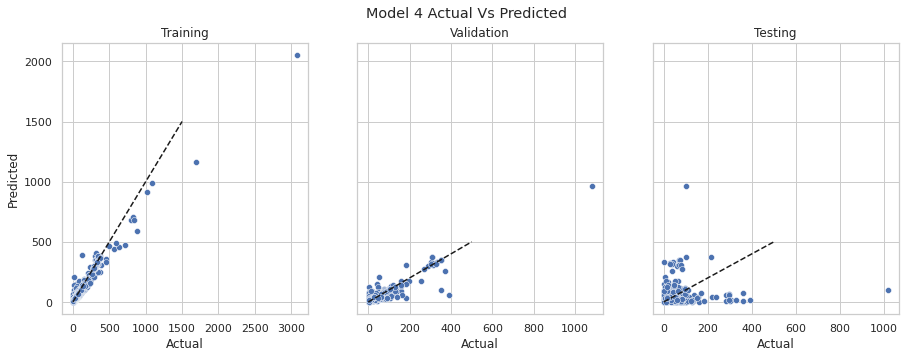

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) #Setting up a subfigure
fig.suptitle('Model 4 Actual Vs Predicted')
sns.set(style="whitegrid")

#Training
sns.scatterplot(ax=axes[0], 
            x= y_train_pca4, 
            y= train_pred_pca4)

#Validation
sns.scatterplot(ax=axes[1], 
            x=y_valid_pca4,
             y=valid_pred_pca4)

#Test
sns.scatterplot(ax=axes[2],
                x=y_test_pca4,
                y=test_pred_pca4)

#Titles
axes[0].set_title('Training')
axes[1].set_title('Validation')
axes[2].set_title('Testing')

#xlabels
axes[0].set_xlabel('Actual')
axes[1].set_xlabel('Actual')
axes[2].set_xlabel('Actual')

#ylabels
axes[0].set_ylabel('Predicted')
axes[1].set_ylabel('Predicted')
axes[2].set_ylabel('Predicted')

# 45 degree line (Fit Lines)
axes[0].plot([0, 1500], [0, 1500], '--k')
axes[1].plot([0, 500], [0, 500], '--k') 
axes[2].plot([0, 500], [0, 500], '--k')

plt.show()

## Model 4 metadata

In [103]:
# meta data, resetting index for the combining of data

Xtest_meta4.reset_index(drop=True, inplace=True)
y_test_pca4 = pd.DataFrame(y_test_pca4, columns=['y_test_pca4'])
y_test_pca4.reset_index(drop=True, inplace=True)
test_pred_pca4 = pd.DataFrame(test_pred_pca4, columns=['test_pred_pca4'])
test_pred_pca4.reset_index(drop=True, inplace=True)

In [104]:
#concatenating the data to add back the metadata columns

df_combine4 = pd.concat([Xtest_meta4, y_test_pca4,test_pred_pca4], axis=1)
df_combine4

,Category,Description,Nutrient Data Bank Number,y_test_pca4,test_pred_pca4
0,Pork chop,"Pork chop, breaded or floured, broiled or bake...",22101150,74,18.43
1,Cream puff,"Cream puff, eclair, custard or cream filled, iced",53420200,66,4.65
2,Animal fat or drippings,Animal fat or drippings,81201000,93,18.01
3,Pork steak or cutlet,"Pork steak or cutlet, NS as to cooking method,...",22201000,82,20.08
4,White pizza,"White pizza, cheese, with meat, thick crust",58107224,30,58.48
...,...,...,...,...,...
414,Meatballs,"Meatballs, Puerto Rican style",27118110,64,91.97
415,Strudel,"Strudel, cheese",53440600,60,13.46
416,Chicken,"Chicken, for use with vegetables",89901006,112,97.98
417,Turkey light or dark meat,"Turkey light or dark meat, stewed, skin eaten",24201420,98,105.02


In [105]:
df_combine4['residuals'] = df_combine4['test_pred_pca4'] - df_combine4['y_test_pca4']
df_combine4.residuals.max()

863.33

In [106]:
df_combine4.iloc[[df_combine4["residuals"].abs().idxmax()]]

#Roe is very bad category in this case and is over estimating

,Category,Description,Nutrient Data Bank Number,y_test_pca4,test_pred_pca4,residuals
342,Egg,"Egg, yolk only, cooked, fat added",31111020,1015,97.51,-917.49


In [107]:
df_combine4.iloc[[df_combine4["test_pred_pca4"].idxmin()]]

# negative prediction can be seen in cheese category

,Category,Description,Nutrient Data Bank Number,y_test_pca4,test_pred_pca4,residuals
55,Trout,"Trout, coated, baked or broiled, made with oil",26151130,56,1.0,-55.0


# Classification


In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

median = df['Data.Cholesterol'].median()
df.loc[df['Data.Cholesterol'] <= median, 'Classification'] = 0 
df.loc[df['Data.Cholesterol'] > median, 'Classification'] = 1
x = df[['Data.Choline','Data.Carbohydrate']]
y = df['Classification']

random.seed(5)
xtrain, xvalidate, xtest = np.split(x.sample(frac=1), [int(.8*len(x)), int(.9*len(x))])
ytrain, yvalidate, ytest = np.split(y.sample(frac=1), [int(.8*len(y)), int(.9*len(y))])

lr = LogisticRegression(max_iter=10000)
lr.fit(xtrain, ytrain) 
print(lr.score(xtrain, ytrain)) 
print(lr.score(xtest, ytest)) 
print(lr.score(xvalidate, yvalidate))

0.5035294117647059
0.5015673981191222
0.4835164835164835


In [109]:
x = df[['Data.Choline','Data.Carbohydrate','Data.Fiber', 'Data.Protein']]
y = df['Classification']
random.seed(5)
xtrain2, xvalidate2, xtest2 = np.split(x.sample(frac=1), [int(.8*len(x)), int(.9*len(x))])
ytrain2, yvalidate2, ytest2 = np.split(y.sample(frac=1), [int(.8*len(y)), int(.9*len(y))])
lr = LogisticRegression(max_iter=10000)
lr.fit(xtrain2, ytrain2) 
print(lr.score(xtrain2, ytrain2)) 
print(lr.score(xtest2, ytest2)) 
print(lr.score(xvalidate2, yvalidate2))

0.5096078431372549
0.493730407523511
0.4803767660910518


# Analysis of the model


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

logisticRegr = LogisticRegression()
logisticRegr.fit(xtest, ytest)
predictions_test = logisticRegr.predict(xtest)
cmtest = metrics.confusion_matrix(ytest, predictions_test)
print(cmtest)

[[264  59]
 [258  57]]


In [111]:
logisticRegr = LogisticRegression()
logisticRegr.fit(xtrain, ytrain)
predictions_train = logisticRegr.predict(xtrain)
cmtrain = metrics.confusion_matrix(ytrain, predictions_train)
print(cmtrain)

[[1637  915]
 [1617  931]]


In [112]:
logisticRegr = LogisticRegression()
logisticRegr.fit(xvalidate, yvalidate)
predictions_validate = logisticRegr.predict(xvalidate)
cmvalidate = metrics.confusion_matrix(yvalidate, predictions_validate)
print(cmvalidate)

[[ 85 230]
 [ 79 243]]


In [113]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions_test))
print(classification_report(ytrain, predictions_train))
print(classification_report(yvalidate, predictions_validate))

              precision    recall  f1-score   support

         0.0       0.51      0.82      0.62       323
         1.0       0.49      0.18      0.26       315

    accuracy                           0.50       638
   macro avg       0.50      0.50      0.44       638
weighted avg       0.50      0.50      0.45       638

              precision    recall  f1-score   support

         0.0       0.50      0.64      0.56      2552
         1.0       0.50      0.37      0.42      2548

    accuracy                           0.50      5100
   macro avg       0.50      0.50      0.49      5100
weighted avg       0.50      0.50      0.49      5100

              precision    recall  f1-score   support

         0.0       0.52      0.27      0.35       315
         1.0       0.51      0.75      0.61       322

    accuracy                           0.51       637
   macro avg       0.52      0.51      0.48       637
weighted avg       0.52      0.51      0.48       637



In [114]:
##TP equals True Positive which means we predicted positive and it’s true. 
##TN equals True Negative which means we predicted negative and it’s true and these two are sign of accurrcy and should be as high as possible.
##FP equals False Positive which means we predicted positive and it’s false.
##FN equals False Negative which means we predicted negative and it’s false and these two should be as low as possible.
##Precision is the value of TP divided by the sum of TP and NP. The value of precision explains that how many cases are actually positive from all the classes we have predicted as positive.
##Recall can be calculated by TP divided by the sum of TP and FN and it explains that from all the positive classes, how many we predicted correctly. It also should be as high as possible.
##F1-score is a metric which takes into account both precision and recall and it is the harmonic mean of precision and recall and is a better measure than accuracy. It 
##should be high when model is accurate enough.

##From the F1-score in the classification report, we noticed that for the test set, our model is doing better of 1.0 than 0, for the train set, our model is doing better
##at 0 and for the vaalidate set, our model is doing good for 0 and really bad for 1.0 because the f1-score is close to 0 in this case.

# Conclusion


Some of the key takeways from analysis and modeling on this dataset is as follows:
1. I was able to derive the correlation between various food nutrients
2. I was draw insights that allowed us to recommend food intake based on diet restrictions
3. I was able to predict the presence of cholesterol in a food based on other nutrient values, and looking at data from similar food categories

For future project we can include more data sources that could give us deeper insights into eating habits, or lifestyle, based on the geographical location or other factors, and then using health data of these populations to draw better conclusions



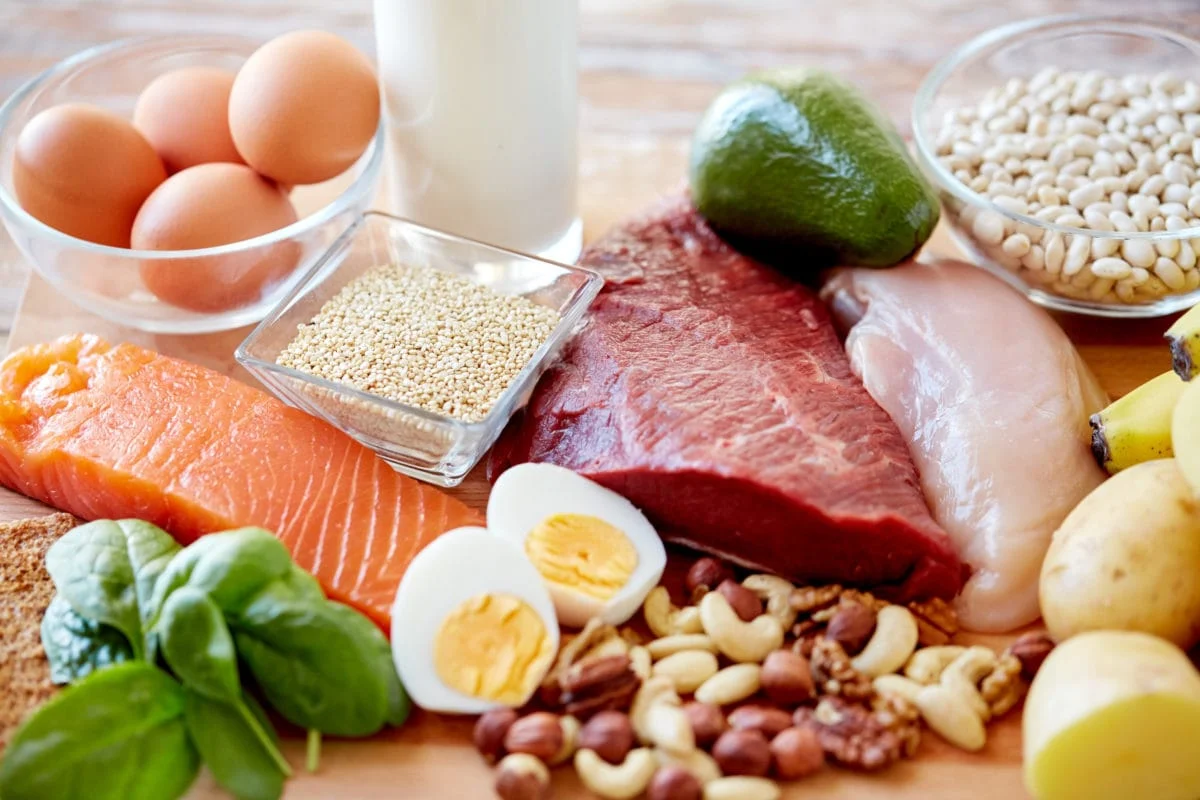